In [ ]:
!pip install graphviz
from IPython.display import Image
import graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# de Bruijn Graph from a String

In this question, you will be asked to implement a function that builds the de Bruijn graph of a string *text* with an integer *k*. Specifically, each unique (k-1)-mer in *text* will become a node in the de Bruijn graph, and each k-mer in *text* will become an edge connecting the node representing its prefix (k-1)-mer and its suffix (k-1)-mer.

Complete the following function. Given `text` and `k`, store all the nodes of the de Bruijn graph in a set of strings, and all the edges in a list of tuples, where each tuple contains two (k-1)-mers in the order of the directed edge.

For example, for `text='ABC'`, the nodes should be `set('AB','BC')` and the edges should be `[('AB','BC')]`

In [ ]:
def build_de_bruijn(text, k):
    """ 
    Return 
    1. a list holding, for each k-mer, its left k-1-mer and its right k-1-mer in a pair 
    2. a set of all nodes
    """
    edges = []
    nodes = set()
    for i in range(len(text) - k + 1):
        prefix = text[i:i+k-1]
        suffix = text[i+1:i+k]
        edges.append((prefix, suffix))
        nodes.add(prefix)
        nodes.add(suffix)
    return nodes, edges

The following two functions are for visualizing the de Bruijn graph. **Do not modify**.

In [ ]:
def visualize_de_bruijn(nodes, edges):
    """ Visualize a directed multigraph using graphviz """
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

def plot_graph(graph_string):
    graph = graphviz.Source(graph_string)
    graph.format = 'png'
    graph.render('graph')
    display(Image(filename='graph.png'))

Here is an example of how to use the graph plotting function along with your graph construction algorithm to construct and visualize a de Bruijn graph from a simple string. 

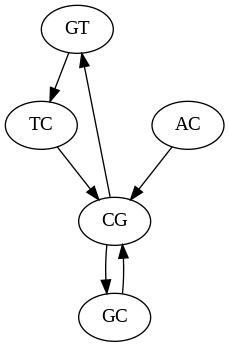

In [ ]:
nodes1, edges1 = build_de_bruijn("ACGCGTCG", 3)
plot_graph(visualize_de_bruijn(nodes1, edges1))

Now, we test on a slightly more complicated test case:

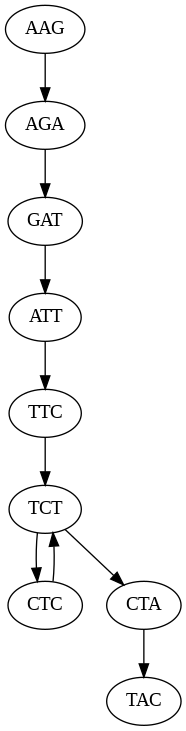

In [ ]:
nodes2, edges2 = build_de_bruijn("AAGATTCTCTAC", 4)
plot_graph(visualize_de_bruijn(nodes2, edges2))

And finally on a larger dataset:

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.363645 to fit


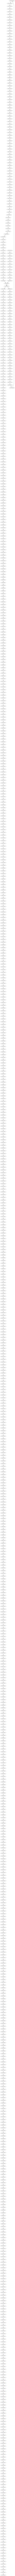

In [ ]:
nodes3, edges3 = build_de_bruijn("CTGAAGACCTCTCCACATTACTACGATATAAATCATTTCAGCCTCTAGATACGCCTTGGTGGGTGGGGTTGGCAATTTACGATATGTCCGAATGATTTGACACCAAATACCTTAGCTAGCCCCAAGGAAAATTCTGGGCTTTACGTTGGCCGAGCCACATTACTACAGTAAGGTTAAGCAACCAGCCAGTCGCTCATAAGGACTCCACGCCTCCCGTTACTGACTTCCAACAACAATGTGACAGTAGACTGGAACCTGGGAGGACATTATTGATTCGCCGCGAATCTTCTAAGGTATTTTACCCCCACTGGTCACCTTAACCATTAAGACCTCGAAGTGACACCTAGCCTCTTAACACCCAACTCCACCGACAATACCTATTCGCTGACAAGCGGGACATCCGATCGCCCCTGACTCGAGGTGTCTACCGTCCATCGATTGCTAAACTTTGTTAGGAGTCTAAGCGAACCATGGGAAGGGGGCGGCAGTCAACGTGCTCCTTTAGTGAGGTACCATATTCTTACAGCATGTGGAGCGCAGCAAACTAGCGACCGGGAGTACTCCCACAACCCTGGGTACGTACTGCACTTTTTTCAAGAGCCAGGGTCATTTAAATAGCATCTTTGCTCTTTCTGATAAGGGGGCGACCATCTCCGAATTGAGCCAAACGCTGGTATAAGACTCGTCTCATGACTCCCTAGCCATTTGTATGTTGTCATTTCTGATTTTAGCAGGTAAAACGTAAGGCCTGCTAAAGAATCACGCGGGGAGGCCTTAAATTTCGTCATGGAGCAATCGTCCTAGATTGCTGTGAAGGTTCGTACCAGTAGAGTCTAATGTGCGTAAATGTTAACTGGCCGTATATTCTCTGGTGAGCTGAAACAGAAAGCTGGCAGAAAGCCACTCTTGCTGTTTCGTGTGTACGGACATCGGGATAGTACCAAAAAGCATGTTCTTCATCTGGCGATGCTTGATGTCTACCGTAGACACCTTCATACGT", 12)
plot_graph(visualize_de_bruijn(nodes3, edges3))

To check the correctness of your algorithm, the following cell should print True.

In [ ]:
groundtruth_edges3 = [('CTGAAGACCTC', 'TGAAGACCTCT'), ('TGAAGACCTCT', 'GAAGACCTCTC'), ('GAAGACCTCTC', 'AAGACCTCTCC'), ('AAGACCTCTCC', 'AGACCTCTCCA'), ('AGACCTCTCCA', 'GACCTCTCCAC'), ('GACCTCTCCAC', 'ACCTCTCCACA'), ('ACCTCTCCACA', 'CCTCTCCACAT'), ('CCTCTCCACAT', 'CTCTCCACATT'), ('CTCTCCACATT', 'TCTCCACATTA'), ('TCTCCACATTA', 'CTCCACATTAC'), ('CTCCACATTAC', 'TCCACATTACT'), ('TCCACATTACT', 'CCACATTACTA'), ('CCACATTACTA', 'CACATTACTAC'), ('CACATTACTAC', 'ACATTACTACG'), ('ACATTACTACG', 'CATTACTACGA'), ('CATTACTACGA', 'ATTACTACGAT'), ('ATTACTACGAT', 'TTACTACGATA'), ('TTACTACGATA', 'TACTACGATAT'), ('TACTACGATAT', 'ACTACGATATA'), ('ACTACGATATA', 'CTACGATATAA'), ('CTACGATATAA', 'TACGATATAAA'), ('TACGATATAAA', 'ACGATATAAAT'), ('ACGATATAAAT', 'CGATATAAATC'), ('CGATATAAATC', 'GATATAAATCA'), ('GATATAAATCA', 'ATATAAATCAT'), ('ATATAAATCAT', 'TATAAATCATT'), ('TATAAATCATT', 'ATAAATCATTT'), ('ATAAATCATTT', 'TAAATCATTTC'), ('TAAATCATTTC', 'AAATCATTTCA'), ('AAATCATTTCA', 'AATCATTTCAG'), ('AATCATTTCAG', 'ATCATTTCAGC'), ('ATCATTTCAGC', 'TCATTTCAGCC'), ('TCATTTCAGCC', 'CATTTCAGCCT'), ('CATTTCAGCCT', 'ATTTCAGCCTC'), ('ATTTCAGCCTC', 'TTTCAGCCTCT'), ('TTTCAGCCTCT', 'TTCAGCCTCTA'), ('TTCAGCCTCTA', 'TCAGCCTCTAG'), ('TCAGCCTCTAG', 'CAGCCTCTAGA'), ('CAGCCTCTAGA', 'AGCCTCTAGAT'), ('AGCCTCTAGAT', 'GCCTCTAGATA'), ('GCCTCTAGATA', 'CCTCTAGATAC'), ('CCTCTAGATAC', 'CTCTAGATACG'), ('CTCTAGATACG', 'TCTAGATACGC'), ('TCTAGATACGC', 'CTAGATACGCC'), ('CTAGATACGCC', 'TAGATACGCCT'), ('TAGATACGCCT', 'AGATACGCCTT'), ('AGATACGCCTT', 'GATACGCCTTG'), ('GATACGCCTTG', 'ATACGCCTTGG'), ('ATACGCCTTGG', 'TACGCCTTGGT'), ('TACGCCTTGGT', 'ACGCCTTGGTG'), ('ACGCCTTGGTG', 'CGCCTTGGTGG'), ('CGCCTTGGTGG', 'GCCTTGGTGGG'), ('GCCTTGGTGGG', 'CCTTGGTGGGT'), ('CCTTGGTGGGT', 'CTTGGTGGGTG'), ('CTTGGTGGGTG', 'TTGGTGGGTGG'), ('TTGGTGGGTGG', 'TGGTGGGTGGG'), ('TGGTGGGTGGG', 'GGTGGGTGGGG'), ('GGTGGGTGGGG', 'GTGGGTGGGGT'), ('GTGGGTGGGGT', 'TGGGTGGGGTT'), ('TGGGTGGGGTT', 'GGGTGGGGTTG'), ('GGGTGGGGTTG', 'GGTGGGGTTGG'), ('GGTGGGGTTGG', 'GTGGGGTTGGC'), ('GTGGGGTTGGC', 'TGGGGTTGGCA'), ('TGGGGTTGGCA', 'GGGGTTGGCAA'), ('GGGGTTGGCAA', 'GGGTTGGCAAT'), ('GGGTTGGCAAT', 'GGTTGGCAATT'), ('GGTTGGCAATT', 'GTTGGCAATTT'), ('GTTGGCAATTT', 'TTGGCAATTTA'), ('TTGGCAATTTA', 'TGGCAATTTAC'), ('TGGCAATTTAC', 'GGCAATTTACG'), ('GGCAATTTACG', 'GCAATTTACGA'), ('GCAATTTACGA', 'CAATTTACGAT'), ('CAATTTACGAT', 'AATTTACGATA'), ('AATTTACGATA', 'ATTTACGATAT'), ('ATTTACGATAT', 'TTTACGATATG'), ('TTTACGATATG', 'TTACGATATGT'), ('TTACGATATGT', 'TACGATATGTC'), ('TACGATATGTC', 'ACGATATGTCC'), ('ACGATATGTCC', 'CGATATGTCCG'), ('CGATATGTCCG', 'GATATGTCCGA'), ('GATATGTCCGA', 'ATATGTCCGAA'), ('ATATGTCCGAA', 'TATGTCCGAAT'), ('TATGTCCGAAT', 'ATGTCCGAATG'), ('ATGTCCGAATG', 'TGTCCGAATGA'), ('TGTCCGAATGA', 'GTCCGAATGAT'), ('GTCCGAATGAT', 'TCCGAATGATT'), ('TCCGAATGATT', 'CCGAATGATTT'), ('CCGAATGATTT', 'CGAATGATTTG'), ('CGAATGATTTG', 'GAATGATTTGA'), ('GAATGATTTGA', 'AATGATTTGAC'), ('AATGATTTGAC', 'ATGATTTGACA'), ('ATGATTTGACA', 'TGATTTGACAC'), ('TGATTTGACAC', 'GATTTGACACC'), ('GATTTGACACC', 'ATTTGACACCA'), ('ATTTGACACCA', 'TTTGACACCAA'), ('TTTGACACCAA', 'TTGACACCAAA'), ('TTGACACCAAA', 'TGACACCAAAT'), ('TGACACCAAAT', 'GACACCAAATA'), ('GACACCAAATA', 'ACACCAAATAC'), ('ACACCAAATAC', 'CACCAAATACC'), ('CACCAAATACC', 'ACCAAATACCT'), ('ACCAAATACCT', 'CCAAATACCTT'), ('CCAAATACCTT', 'CAAATACCTTA'), ('CAAATACCTTA', 'AAATACCTTAG'), ('AAATACCTTAG', 'AATACCTTAGC'), ('AATACCTTAGC', 'ATACCTTAGCT'), ('ATACCTTAGCT', 'TACCTTAGCTA'), ('TACCTTAGCTA', 'ACCTTAGCTAG'), ('ACCTTAGCTAG', 'CCTTAGCTAGC'), ('CCTTAGCTAGC', 'CTTAGCTAGCC'), ('CTTAGCTAGCC', 'TTAGCTAGCCC'), ('TTAGCTAGCCC', 'TAGCTAGCCCC'), ('TAGCTAGCCCC', 'AGCTAGCCCCA'), ('AGCTAGCCCCA', 'GCTAGCCCCAA'), ('GCTAGCCCCAA', 'CTAGCCCCAAG'), ('CTAGCCCCAAG', 'TAGCCCCAAGG'), ('TAGCCCCAAGG', 'AGCCCCAAGGA'), ('AGCCCCAAGGA', 'GCCCCAAGGAA'), ('GCCCCAAGGAA', 'CCCCAAGGAAA'), ('CCCCAAGGAAA', 'CCCAAGGAAAA'), ('CCCAAGGAAAA', 'CCAAGGAAAAT'), ('CCAAGGAAAAT', 'CAAGGAAAATT'), ('CAAGGAAAATT', 'AAGGAAAATTC'), ('AAGGAAAATTC', 'AGGAAAATTCT'), ('AGGAAAATTCT', 'GGAAAATTCTG'), ('GGAAAATTCTG', 'GAAAATTCTGG'), ('GAAAATTCTGG', 'AAAATTCTGGG'), ('AAAATTCTGGG', 'AAATTCTGGGC'), ('AAATTCTGGGC', 'AATTCTGGGCT'), ('AATTCTGGGCT', 'ATTCTGGGCTT'), ('ATTCTGGGCTT', 'TTCTGGGCTTT'), ('TTCTGGGCTTT', 'TCTGGGCTTTA'), ('TCTGGGCTTTA', 'CTGGGCTTTAC'), ('CTGGGCTTTAC', 'TGGGCTTTACG'), ('TGGGCTTTACG', 'GGGCTTTACGT'), ('GGGCTTTACGT', 'GGCTTTACGTT'), ('GGCTTTACGTT', 'GCTTTACGTTG'), ('GCTTTACGTTG', 'CTTTACGTTGG'), ('CTTTACGTTGG', 'TTTACGTTGGC'), ('TTTACGTTGGC', 'TTACGTTGGCC'), ('TTACGTTGGCC', 'TACGTTGGCCG'), ('TACGTTGGCCG', 'ACGTTGGCCGA'), ('ACGTTGGCCGA', 'CGTTGGCCGAG'), ('CGTTGGCCGAG', 'GTTGGCCGAGC'), ('GTTGGCCGAGC', 'TTGGCCGAGCC'), ('TTGGCCGAGCC', 'TGGCCGAGCCA'), ('TGGCCGAGCCA', 'GGCCGAGCCAC'), ('GGCCGAGCCAC', 'GCCGAGCCACA'), ('GCCGAGCCACA', 'CCGAGCCACAT'), ('CCGAGCCACAT', 'CGAGCCACATT'), ('CGAGCCACATT', 'GAGCCACATTA'), ('GAGCCACATTA', 'AGCCACATTAC'), ('AGCCACATTAC', 'GCCACATTACT'), ('GCCACATTACT', 'CCACATTACTA'), ('CCACATTACTA', 'CACATTACTAC'), ('CACATTACTAC', 'ACATTACTACA'), ('ACATTACTACA', 'CATTACTACAG'), ('CATTACTACAG', 'ATTACTACAGT'), ('ATTACTACAGT', 'TTACTACAGTA'), ('TTACTACAGTA', 'TACTACAGTAA'), ('TACTACAGTAA', 'ACTACAGTAAG'), ('ACTACAGTAAG', 'CTACAGTAAGG'), ('CTACAGTAAGG', 'TACAGTAAGGT'), ('TACAGTAAGGT', 'ACAGTAAGGTT'), ('ACAGTAAGGTT', 'CAGTAAGGTTA'), ('CAGTAAGGTTA', 'AGTAAGGTTAA'), ('AGTAAGGTTAA', 'GTAAGGTTAAG'), ('GTAAGGTTAAG', 'TAAGGTTAAGC'), ('TAAGGTTAAGC', 'AAGGTTAAGCA'), ('AAGGTTAAGCA', 'AGGTTAAGCAA'), ('AGGTTAAGCAA', 'GGTTAAGCAAC'), ('GGTTAAGCAAC', 'GTTAAGCAACC'), ('GTTAAGCAACC', 'TTAAGCAACCA'), ('TTAAGCAACCA', 'TAAGCAACCAG'), ('TAAGCAACCAG', 'AAGCAACCAGC'), ('AAGCAACCAGC', 'AGCAACCAGCC'), ('AGCAACCAGCC', 'GCAACCAGCCA'), ('GCAACCAGCCA', 'CAACCAGCCAG'), ('CAACCAGCCAG', 'AACCAGCCAGT'), ('AACCAGCCAGT', 'ACCAGCCAGTC'), ('ACCAGCCAGTC', 'CCAGCCAGTCG'), ('CCAGCCAGTCG', 'CAGCCAGTCGC'), ('CAGCCAGTCGC', 'AGCCAGTCGCT'), ('AGCCAGTCGCT', 'GCCAGTCGCTC'), ('GCCAGTCGCTC', 'CCAGTCGCTCA'), ('CCAGTCGCTCA', 'CAGTCGCTCAT'), ('CAGTCGCTCAT', 'AGTCGCTCATA'), ('AGTCGCTCATA', 'GTCGCTCATAA'), ('GTCGCTCATAA', 'TCGCTCATAAG'), ('TCGCTCATAAG', 'CGCTCATAAGG'), ('CGCTCATAAGG', 'GCTCATAAGGA'), ('GCTCATAAGGA', 'CTCATAAGGAC'), ('CTCATAAGGAC', 'TCATAAGGACT'), ('TCATAAGGACT', 'CATAAGGACTC'), ('CATAAGGACTC', 'ATAAGGACTCC'), ('ATAAGGACTCC', 'TAAGGACTCCA'), ('TAAGGACTCCA', 'AAGGACTCCAC'), ('AAGGACTCCAC', 'AGGACTCCACG'), ('AGGACTCCACG', 'GGACTCCACGC'), ('GGACTCCACGC', 'GACTCCACGCC'), ('GACTCCACGCC', 'ACTCCACGCCT'), ('ACTCCACGCCT', 'CTCCACGCCTC'), ('CTCCACGCCTC', 'TCCACGCCTCC'), ('TCCACGCCTCC', 'CCACGCCTCCC'), ('CCACGCCTCCC', 'CACGCCTCCCG'), ('CACGCCTCCCG', 'ACGCCTCCCGT'), ('ACGCCTCCCGT', 'CGCCTCCCGTT'), ('CGCCTCCCGTT', 'GCCTCCCGTTA'), ('GCCTCCCGTTA', 'CCTCCCGTTAC'), ('CCTCCCGTTAC', 'CTCCCGTTACT'), ('CTCCCGTTACT', 'TCCCGTTACTG'), ('TCCCGTTACTG', 'CCCGTTACTGA'), ('CCCGTTACTGA', 'CCGTTACTGAC'), ('CCGTTACTGAC', 'CGTTACTGACT'), ('CGTTACTGACT', 'GTTACTGACTT'), ('GTTACTGACTT', 'TTACTGACTTC'), ('TTACTGACTTC', 'TACTGACTTCC'), ('TACTGACTTCC', 'ACTGACTTCCA'), ('ACTGACTTCCA', 'CTGACTTCCAA'), ('CTGACTTCCAA', 'TGACTTCCAAC'), ('TGACTTCCAAC', 'GACTTCCAACA'), ('GACTTCCAACA', 'ACTTCCAACAA'), ('ACTTCCAACAA', 'CTTCCAACAAC'), ('CTTCCAACAAC', 'TTCCAACAACA'), ('TTCCAACAACA', 'TCCAACAACAA'), ('TCCAACAACAA', 'CCAACAACAAT'), ('CCAACAACAAT', 'CAACAACAATG'), ('CAACAACAATG', 'AACAACAATGT'), ('AACAACAATGT', 'ACAACAATGTG'), ('ACAACAATGTG', 'CAACAATGTGA'), ('CAACAATGTGA', 'AACAATGTGAC'), ('AACAATGTGAC', 'ACAATGTGACA'), ('ACAATGTGACA', 'CAATGTGACAG'), ('CAATGTGACAG', 'AATGTGACAGT'), ('AATGTGACAGT', 'ATGTGACAGTA'), ('ATGTGACAGTA', 'TGTGACAGTAG'), ('TGTGACAGTAG', 'GTGACAGTAGA'), ('GTGACAGTAGA', 'TGACAGTAGAC'), ('TGACAGTAGAC', 'GACAGTAGACT'), ('GACAGTAGACT', 'ACAGTAGACTG'), ('ACAGTAGACTG', 'CAGTAGACTGG'), ('CAGTAGACTGG', 'AGTAGACTGGA'), ('AGTAGACTGGA', 'GTAGACTGGAA'), ('GTAGACTGGAA', 'TAGACTGGAAC'), ('TAGACTGGAAC', 'AGACTGGAACC'), ('AGACTGGAACC', 'GACTGGAACCT'), ('GACTGGAACCT', 'ACTGGAACCTG'), ('ACTGGAACCTG', 'CTGGAACCTGG'), ('CTGGAACCTGG', 'TGGAACCTGGG'), ('TGGAACCTGGG', 'GGAACCTGGGA'), ('GGAACCTGGGA', 'GAACCTGGGAG'), ('GAACCTGGGAG', 'AACCTGGGAGG'), ('AACCTGGGAGG', 'ACCTGGGAGGA'), ('ACCTGGGAGGA', 'CCTGGGAGGAC'), ('CCTGGGAGGAC', 'CTGGGAGGACA'), ('CTGGGAGGACA', 'TGGGAGGACAT'), ('TGGGAGGACAT', 'GGGAGGACATT'), ('GGGAGGACATT', 'GGAGGACATTA'), ('GGAGGACATTA', 'GAGGACATTAT'), ('GAGGACATTAT', 'AGGACATTATT'), ('AGGACATTATT', 'GGACATTATTG'), ('GGACATTATTG', 'GACATTATTGA'), ('GACATTATTGA', 'ACATTATTGAT'), ('ACATTATTGAT', 'CATTATTGATT'), ('CATTATTGATT', 'ATTATTGATTC'), ('ATTATTGATTC', 'TTATTGATTCG'), ('TTATTGATTCG', 'TATTGATTCGC'), ('TATTGATTCGC', 'ATTGATTCGCC'), ('ATTGATTCGCC', 'TTGATTCGCCG'), ('TTGATTCGCCG', 'TGATTCGCCGC'), ('TGATTCGCCGC', 'GATTCGCCGCG'), ('GATTCGCCGCG', 'ATTCGCCGCGA'), ('ATTCGCCGCGA', 'TTCGCCGCGAA'), ('TTCGCCGCGAA', 'TCGCCGCGAAT'), ('TCGCCGCGAAT', 'CGCCGCGAATC'), ('CGCCGCGAATC', 'GCCGCGAATCT'), ('GCCGCGAATCT', 'CCGCGAATCTT'), ('CCGCGAATCTT', 'CGCGAATCTTC'), ('CGCGAATCTTC', 'GCGAATCTTCT'), ('GCGAATCTTCT', 'CGAATCTTCTA'), ('CGAATCTTCTA', 'GAATCTTCTAA'), ('GAATCTTCTAA', 'AATCTTCTAAG'), ('AATCTTCTAAG', 'ATCTTCTAAGG'), ('ATCTTCTAAGG', 'TCTTCTAAGGT'), ('TCTTCTAAGGT', 'CTTCTAAGGTA'), ('CTTCTAAGGTA', 'TTCTAAGGTAT'), ('TTCTAAGGTAT', 'TCTAAGGTATT'), ('TCTAAGGTATT', 'CTAAGGTATTT'), ('CTAAGGTATTT', 'TAAGGTATTTT'), ('TAAGGTATTTT', 'AAGGTATTTTA'), ('AAGGTATTTTA', 'AGGTATTTTAC'), ('AGGTATTTTAC', 'GGTATTTTACC'), ('GGTATTTTACC', 'GTATTTTACCC'), ('GTATTTTACCC', 'TATTTTACCCC'), ('TATTTTACCCC', 'ATTTTACCCCC'), ('ATTTTACCCCC', 'TTTTACCCCCA'), ('TTTTACCCCCA', 'TTTACCCCCAC'), ('TTTACCCCCAC', 'TTACCCCCACT'), ('TTACCCCCACT', 'TACCCCCACTG'), ('TACCCCCACTG', 'ACCCCCACTGG'), ('ACCCCCACTGG', 'CCCCCACTGGT'), ('CCCCCACTGGT', 'CCCCACTGGTC'), ('CCCCACTGGTC', 'CCCACTGGTCA'), ('CCCACTGGTCA', 'CCACTGGTCAC'), ('CCACTGGTCAC', 'CACTGGTCACC'), ('CACTGGTCACC', 'ACTGGTCACCT'), ('ACTGGTCACCT', 'CTGGTCACCTT'), ('CTGGTCACCTT', 'TGGTCACCTTA'), ('TGGTCACCTTA', 'GGTCACCTTAA'), ('GGTCACCTTAA', 'GTCACCTTAAC'), ('GTCACCTTAAC', 'TCACCTTAACC'), ('TCACCTTAACC', 'CACCTTAACCA'), ('CACCTTAACCA', 'ACCTTAACCAT'), ('ACCTTAACCAT', 'CCTTAACCATT'), ('CCTTAACCATT', 'CTTAACCATTA'), ('CTTAACCATTA', 'TTAACCATTAA'), ('TTAACCATTAA', 'TAACCATTAAG'), ('TAACCATTAAG', 'AACCATTAAGA'), ('AACCATTAAGA', 'ACCATTAAGAC'), ('ACCATTAAGAC', 'CCATTAAGACC'), ('CCATTAAGACC', 'CATTAAGACCT'), ('CATTAAGACCT', 'ATTAAGACCTC'), ('ATTAAGACCTC', 'TTAAGACCTCG'), ('TTAAGACCTCG', 'TAAGACCTCGA'), ('TAAGACCTCGA', 'AAGACCTCGAA'), ('AAGACCTCGAA', 'AGACCTCGAAG'), ('AGACCTCGAAG', 'GACCTCGAAGT'), ('GACCTCGAAGT', 'ACCTCGAAGTG'), ('ACCTCGAAGTG', 'CCTCGAAGTGA'), ('CCTCGAAGTGA', 'CTCGAAGTGAC'), ('CTCGAAGTGAC', 'TCGAAGTGACA'), ('TCGAAGTGACA', 'CGAAGTGACAC'), ('CGAAGTGACAC', 'GAAGTGACACC'), ('GAAGTGACACC', 'AAGTGACACCT'), ('AAGTGACACCT', 'AGTGACACCTA'), ('AGTGACACCTA', 'GTGACACCTAG'), ('GTGACACCTAG', 'TGACACCTAGC'), ('TGACACCTAGC', 'GACACCTAGCC'), ('GACACCTAGCC', 'ACACCTAGCCT'), ('ACACCTAGCCT', 'CACCTAGCCTC'), ('CACCTAGCCTC', 'ACCTAGCCTCT'), ('ACCTAGCCTCT', 'CCTAGCCTCTT'), ('CCTAGCCTCTT', 'CTAGCCTCTTA'), ('CTAGCCTCTTA', 'TAGCCTCTTAA'), ('TAGCCTCTTAA', 'AGCCTCTTAAC'), ('AGCCTCTTAAC', 'GCCTCTTAACA'), ('GCCTCTTAACA', 'CCTCTTAACAC'), ('CCTCTTAACAC', 'CTCTTAACACC'), ('CTCTTAACACC', 'TCTTAACACCC'), ('TCTTAACACCC', 'CTTAACACCCA'), ('CTTAACACCCA', 'TTAACACCCAA'), ('TTAACACCCAA', 'TAACACCCAAC'), ('TAACACCCAAC', 'AACACCCAACT'), ('AACACCCAACT', 'ACACCCAACTC'), ('ACACCCAACTC', 'CACCCAACTCC'), ('CACCCAACTCC', 'ACCCAACTCCA'), ('ACCCAACTCCA', 'CCCAACTCCAC'), ('CCCAACTCCAC', 'CCAACTCCACC'), ('CCAACTCCACC', 'CAACTCCACCG'), ('CAACTCCACCG', 'AACTCCACCGA'), ('AACTCCACCGA', 'ACTCCACCGAC'), ('ACTCCACCGAC', 'CTCCACCGACA'), ('CTCCACCGACA', 'TCCACCGACAA'), ('TCCACCGACAA', 'CCACCGACAAT'), ('CCACCGACAAT', 'CACCGACAATA'), ('CACCGACAATA', 'ACCGACAATAC'), ('ACCGACAATAC', 'CCGACAATACC'), ('CCGACAATACC', 'CGACAATACCT'), ('CGACAATACCT', 'GACAATACCTA'), ('GACAATACCTA', 'ACAATACCTAT'), ('ACAATACCTAT', 'CAATACCTATT'), ('CAATACCTATT', 'AATACCTATTC'), ('AATACCTATTC', 'ATACCTATTCG'), ('ATACCTATTCG', 'TACCTATTCGC'), ('TACCTATTCGC', 'ACCTATTCGCT'), ('ACCTATTCGCT', 'CCTATTCGCTG'), ('CCTATTCGCTG', 'CTATTCGCTGA'), ('CTATTCGCTGA', 'TATTCGCTGAC'), ('TATTCGCTGAC', 'ATTCGCTGACA'), ('ATTCGCTGACA', 'TTCGCTGACAA'), ('TTCGCTGACAA', 'TCGCTGACAAG'), ('TCGCTGACAAG', 'CGCTGACAAGC'), ('CGCTGACAAGC', 'GCTGACAAGCG'), ('GCTGACAAGCG', 'CTGACAAGCGG'), ('CTGACAAGCGG', 'TGACAAGCGGG'), ('TGACAAGCGGG', 'GACAAGCGGGA'), ('GACAAGCGGGA', 'ACAAGCGGGAC'), ('ACAAGCGGGAC', 'CAAGCGGGACA'), ('CAAGCGGGACA', 'AAGCGGGACAT'), ('AAGCGGGACAT', 'AGCGGGACATC'), ('AGCGGGACATC', 'GCGGGACATCC'), ('GCGGGACATCC', 'CGGGACATCCG'), ('CGGGACATCCG', 'GGGACATCCGA'), ('GGGACATCCGA', 'GGACATCCGAT'), ('GGACATCCGAT', 'GACATCCGATC'), ('GACATCCGATC', 'ACATCCGATCG'), ('ACATCCGATCG', 'CATCCGATCGC'), ('CATCCGATCGC', 'ATCCGATCGCC'), ('ATCCGATCGCC', 'TCCGATCGCCC'), ('TCCGATCGCCC', 'CCGATCGCCCC'), ('CCGATCGCCCC', 'CGATCGCCCCT'), ('CGATCGCCCCT', 'GATCGCCCCTG'), ('GATCGCCCCTG', 'ATCGCCCCTGA'), ('ATCGCCCCTGA', 'TCGCCCCTGAC'), ('TCGCCCCTGAC', 'CGCCCCTGACT'), ('CGCCCCTGACT', 'GCCCCTGACTC'), ('GCCCCTGACTC', 'CCCCTGACTCG'), ('CCCCTGACTCG', 'CCCTGACTCGA'), ('CCCTGACTCGA', 'CCTGACTCGAG'), ('CCTGACTCGAG', 'CTGACTCGAGG'), ('CTGACTCGAGG', 'TGACTCGAGGT'), ('TGACTCGAGGT', 'GACTCGAGGTG'), ('GACTCGAGGTG', 'ACTCGAGGTGT'), ('ACTCGAGGTGT', 'CTCGAGGTGTC'), ('CTCGAGGTGTC', 'TCGAGGTGTCT'), ('TCGAGGTGTCT', 'CGAGGTGTCTA'), ('CGAGGTGTCTA', 'GAGGTGTCTAC'), ('GAGGTGTCTAC', 'AGGTGTCTACC'), ('AGGTGTCTACC', 'GGTGTCTACCG'), ('GGTGTCTACCG', 'GTGTCTACCGT'), ('GTGTCTACCGT', 'TGTCTACCGTC'), ('TGTCTACCGTC', 'GTCTACCGTCC'), ('GTCTACCGTCC', 'TCTACCGTCCA'), ('TCTACCGTCCA', 'CTACCGTCCAT'), ('CTACCGTCCAT', 'TACCGTCCATC'), ('TACCGTCCATC', 'ACCGTCCATCG'), ('ACCGTCCATCG', 'CCGTCCATCGA'), ('CCGTCCATCGA', 'CGTCCATCGAT'), ('CGTCCATCGAT', 'GTCCATCGATT'), ('GTCCATCGATT', 'TCCATCGATTG'), ('TCCATCGATTG', 'CCATCGATTGC'), ('CCATCGATTGC', 'CATCGATTGCT'), ('CATCGATTGCT', 'ATCGATTGCTA'), ('ATCGATTGCTA', 'TCGATTGCTAA'), ('TCGATTGCTAA', 'CGATTGCTAAA'), ('CGATTGCTAAA', 'GATTGCTAAAC'), ('GATTGCTAAAC', 'ATTGCTAAACT'), ('ATTGCTAAACT', 'TTGCTAAACTT'), ('TTGCTAAACTT', 'TGCTAAACTTT'), ('TGCTAAACTTT', 'GCTAAACTTTG'), ('GCTAAACTTTG', 'CTAAACTTTGT'), ('CTAAACTTTGT', 'TAAACTTTGTT'), ('TAAACTTTGTT', 'AAACTTTGTTA'), ('AAACTTTGTTA', 'AACTTTGTTAG'), ('AACTTTGTTAG', 'ACTTTGTTAGG'), ('ACTTTGTTAGG', 'CTTTGTTAGGA'), ('CTTTGTTAGGA', 'TTTGTTAGGAG'), ('TTTGTTAGGAG', 'TTGTTAGGAGT'), ('TTGTTAGGAGT', 'TGTTAGGAGTC'), ('TGTTAGGAGTC', 'GTTAGGAGTCT'), ('GTTAGGAGTCT', 'TTAGGAGTCTA'), ('TTAGGAGTCTA', 'TAGGAGTCTAA'), ('TAGGAGTCTAA', 'AGGAGTCTAAG'), ('AGGAGTCTAAG', 'GGAGTCTAAGC'), ('GGAGTCTAAGC', 'GAGTCTAAGCG'), ('GAGTCTAAGCG', 'AGTCTAAGCGA'), ('AGTCTAAGCGA', 'GTCTAAGCGAA'), ('GTCTAAGCGAA', 'TCTAAGCGAAC'), ('TCTAAGCGAAC', 'CTAAGCGAACC'), ('CTAAGCGAACC', 'TAAGCGAACCA'), ('TAAGCGAACCA', 'AAGCGAACCAT'), ('AAGCGAACCAT', 'AGCGAACCATG'), ('AGCGAACCATG', 'GCGAACCATGG'), ('GCGAACCATGG', 'CGAACCATGGG'), ('CGAACCATGGG', 'GAACCATGGGA'), ('GAACCATGGGA', 'AACCATGGGAA'), ('AACCATGGGAA', 'ACCATGGGAAG'), ('ACCATGGGAAG', 'CCATGGGAAGG'), ('CCATGGGAAGG', 'CATGGGAAGGG'), ('CATGGGAAGGG', 'ATGGGAAGGGG'), ('ATGGGAAGGGG', 'TGGGAAGGGGG'), ('TGGGAAGGGGG', 'GGGAAGGGGGC'), ('GGGAAGGGGGC', 'GGAAGGGGGCG'), ('GGAAGGGGGCG', 'GAAGGGGGCGG'), ('GAAGGGGGCGG', 'AAGGGGGCGGC'), ('AAGGGGGCGGC', 'AGGGGGCGGCA'), ('AGGGGGCGGCA', 'GGGGGCGGCAG'), ('GGGGGCGGCAG', 'GGGGCGGCAGT'), ('GGGGCGGCAGT', 'GGGCGGCAGTC'), ('GGGCGGCAGTC', 'GGCGGCAGTCA'), ('GGCGGCAGTCA', 'GCGGCAGTCAA'), ('GCGGCAGTCAA', 'CGGCAGTCAAC'), ('CGGCAGTCAAC', 'GGCAGTCAACG'), ('GGCAGTCAACG', 'GCAGTCAACGT'), ('GCAGTCAACGT', 'CAGTCAACGTG'), ('CAGTCAACGTG', 'AGTCAACGTGC'), ('AGTCAACGTGC', 'GTCAACGTGCT'), ('GTCAACGTGCT', 'TCAACGTGCTC'), ('TCAACGTGCTC', 'CAACGTGCTCC'), ('CAACGTGCTCC', 'AACGTGCTCCT'), ('AACGTGCTCCT', 'ACGTGCTCCTT'), ('ACGTGCTCCTT', 'CGTGCTCCTTT'), ('CGTGCTCCTTT', 'GTGCTCCTTTA'), ('GTGCTCCTTTA', 'TGCTCCTTTAG'), ('TGCTCCTTTAG', 'GCTCCTTTAGT'), ('GCTCCTTTAGT', 'CTCCTTTAGTG'), ('CTCCTTTAGTG', 'TCCTTTAGTGA'), ('TCCTTTAGTGA', 'CCTTTAGTGAG'), ('CCTTTAGTGAG', 'CTTTAGTGAGG'), ('CTTTAGTGAGG', 'TTTAGTGAGGT'), ('TTTAGTGAGGT', 'TTAGTGAGGTA'), ('TTAGTGAGGTA', 'TAGTGAGGTAC'), ('TAGTGAGGTAC', 'AGTGAGGTACC'), ('AGTGAGGTACC', 'GTGAGGTACCA'), ('GTGAGGTACCA', 'TGAGGTACCAT'), ('TGAGGTACCAT', 'GAGGTACCATA'), ('GAGGTACCATA', 'AGGTACCATAT'), ('AGGTACCATAT', 'GGTACCATATT'), ('GGTACCATATT', 'GTACCATATTC'), ('GTACCATATTC', 'TACCATATTCT'), ('TACCATATTCT', 'ACCATATTCTT'), ('ACCATATTCTT', 'CCATATTCTTA'), ('CCATATTCTTA', 'CATATTCTTAC'), ('CATATTCTTAC', 'ATATTCTTACA'), ('ATATTCTTACA', 'TATTCTTACAG'), ('TATTCTTACAG', 'ATTCTTACAGC'), ('ATTCTTACAGC', 'TTCTTACAGCA'), ('TTCTTACAGCA', 'TCTTACAGCAT'), ('TCTTACAGCAT', 'CTTACAGCATG'), ('CTTACAGCATG', 'TTACAGCATGT'), ('TTACAGCATGT', 'TACAGCATGTG'), ('TACAGCATGTG', 'ACAGCATGTGG'), ('ACAGCATGTGG', 'CAGCATGTGGA'), ('CAGCATGTGGA', 'AGCATGTGGAG'), ('AGCATGTGGAG', 'GCATGTGGAGC'), ('GCATGTGGAGC', 'CATGTGGAGCG'), ('CATGTGGAGCG', 'ATGTGGAGCGC'), ('ATGTGGAGCGC', 'TGTGGAGCGCA'), ('TGTGGAGCGCA', 'GTGGAGCGCAG'), ('GTGGAGCGCAG', 'TGGAGCGCAGC'), ('TGGAGCGCAGC', 'GGAGCGCAGCA'), ('GGAGCGCAGCA', 'GAGCGCAGCAA'), ('GAGCGCAGCAA', 'AGCGCAGCAAA'), ('AGCGCAGCAAA', 'GCGCAGCAAAC'), ('GCGCAGCAAAC', 'CGCAGCAAACT'), ('CGCAGCAAACT', 'GCAGCAAACTA'), ('GCAGCAAACTA', 'CAGCAAACTAG'), ('CAGCAAACTAG', 'AGCAAACTAGC'), ('AGCAAACTAGC', 'GCAAACTAGCG'), ('GCAAACTAGCG', 'CAAACTAGCGA'), ('CAAACTAGCGA', 'AAACTAGCGAC'), ('AAACTAGCGAC', 'AACTAGCGACC'), ('AACTAGCGACC', 'ACTAGCGACCG'), ('ACTAGCGACCG', 'CTAGCGACCGG'), ('CTAGCGACCGG', 'TAGCGACCGGG'), ('TAGCGACCGGG', 'AGCGACCGGGA'), ('AGCGACCGGGA', 'GCGACCGGGAG'), ('GCGACCGGGAG', 'CGACCGGGAGT'), ('CGACCGGGAGT', 'GACCGGGAGTA'), ('GACCGGGAGTA', 'ACCGGGAGTAC'), ('ACCGGGAGTAC', 'CCGGGAGTACT'), ('CCGGGAGTACT', 'CGGGAGTACTC'), ('CGGGAGTACTC', 'GGGAGTACTCC'), ('GGGAGTACTCC', 'GGAGTACTCCC'), ('GGAGTACTCCC', 'GAGTACTCCCA'), ('GAGTACTCCCA', 'AGTACTCCCAC'), ('AGTACTCCCAC', 'GTACTCCCACA'), ('GTACTCCCACA', 'TACTCCCACAA'), ('TACTCCCACAA', 'ACTCCCACAAC'), ('ACTCCCACAAC', 'CTCCCACAACC'), ('CTCCCACAACC', 'TCCCACAACCC'), ('TCCCACAACCC', 'CCCACAACCCT'), ('CCCACAACCCT', 'CCACAACCCTG'), ('CCACAACCCTG', 'CACAACCCTGG'), ('CACAACCCTGG', 'ACAACCCTGGG'), ('ACAACCCTGGG', 'CAACCCTGGGT'), ('CAACCCTGGGT', 'AACCCTGGGTA'), ('AACCCTGGGTA', 'ACCCTGGGTAC'), ('ACCCTGGGTAC', 'CCCTGGGTACG'), ('CCCTGGGTACG', 'CCTGGGTACGT'), ('CCTGGGTACGT', 'CTGGGTACGTA'), ('CTGGGTACGTA', 'TGGGTACGTAC'), ('TGGGTACGTAC', 'GGGTACGTACT'), ('GGGTACGTACT', 'GGTACGTACTG'), ('GGTACGTACTG', 'GTACGTACTGC'), ('GTACGTACTGC', 'TACGTACTGCA'), ('TACGTACTGCA', 'ACGTACTGCAC'), ('ACGTACTGCAC', 'CGTACTGCACT'), ('CGTACTGCACT', 'GTACTGCACTT'), ('GTACTGCACTT', 'TACTGCACTTT'), ('TACTGCACTTT', 'ACTGCACTTTT'), ('ACTGCACTTTT', 'CTGCACTTTTT'), ('CTGCACTTTTT', 'TGCACTTTTTT'), ('TGCACTTTTTT', 'GCACTTTTTTC'), ('GCACTTTTTTC', 'CACTTTTTTCA'), ('CACTTTTTTCA', 'ACTTTTTTCAA'), ('ACTTTTTTCAA', 'CTTTTTTCAAG'), ('CTTTTTTCAAG', 'TTTTTTCAAGA'), ('TTTTTTCAAGA', 'TTTTTCAAGAG'), ('TTTTTCAAGAG', 'TTTTCAAGAGC'), ('TTTTCAAGAGC', 'TTTCAAGAGCC'), ('TTTCAAGAGCC', 'TTCAAGAGCCA'), ('TTCAAGAGCCA', 'TCAAGAGCCAG'), ('TCAAGAGCCAG', 'CAAGAGCCAGG'), ('CAAGAGCCAGG', 'AAGAGCCAGGG'), ('AAGAGCCAGGG', 'AGAGCCAGGGT'), ('AGAGCCAGGGT', 'GAGCCAGGGTC'), ('GAGCCAGGGTC', 'AGCCAGGGTCA'), ('AGCCAGGGTCA', 'GCCAGGGTCAT'), ('GCCAGGGTCAT', 'CCAGGGTCATT'), ('CCAGGGTCATT', 'CAGGGTCATTT'), ('CAGGGTCATTT', 'AGGGTCATTTA'), ('AGGGTCATTTA', 'GGGTCATTTAA'), ('GGGTCATTTAA', 'GGTCATTTAAA'), ('GGTCATTTAAA', 'GTCATTTAAAT'), ('GTCATTTAAAT', 'TCATTTAAATA'), ('TCATTTAAATA', 'CATTTAAATAG'), ('CATTTAAATAG', 'ATTTAAATAGC'), ('ATTTAAATAGC', 'TTTAAATAGCA'), ('TTTAAATAGCA', 'TTAAATAGCAT'), ('TTAAATAGCAT', 'TAAATAGCATC'), ('TAAATAGCATC', 'AAATAGCATCT'), ('AAATAGCATCT', 'AATAGCATCTT'), ('AATAGCATCTT', 'ATAGCATCTTT'), ('ATAGCATCTTT', 'TAGCATCTTTG'), ('TAGCATCTTTG', 'AGCATCTTTGC'), ('AGCATCTTTGC', 'GCATCTTTGCT'), ('GCATCTTTGCT', 'CATCTTTGCTC'), ('CATCTTTGCTC', 'ATCTTTGCTCT'), ('ATCTTTGCTCT', 'TCTTTGCTCTT'), ('TCTTTGCTCTT', 'CTTTGCTCTTT'), ('CTTTGCTCTTT', 'TTTGCTCTTTC'), ('TTTGCTCTTTC', 'TTGCTCTTTCT'), ('TTGCTCTTTCT', 'TGCTCTTTCTG'), ('TGCTCTTTCTG', 'GCTCTTTCTGA'), ('GCTCTTTCTGA', 'CTCTTTCTGAT'), ('CTCTTTCTGAT', 'TCTTTCTGATA'), ('TCTTTCTGATA', 'CTTTCTGATAA'), ('CTTTCTGATAA', 'TTTCTGATAAG'), ('TTTCTGATAAG', 'TTCTGATAAGG'), ('TTCTGATAAGG', 'TCTGATAAGGG'), ('TCTGATAAGGG', 'CTGATAAGGGG'), ('CTGATAAGGGG', 'TGATAAGGGGG'), ('TGATAAGGGGG', 'GATAAGGGGGC'), ('GATAAGGGGGC', 'ATAAGGGGGCG'), ('ATAAGGGGGCG', 'TAAGGGGGCGA'), ('TAAGGGGGCGA', 'AAGGGGGCGAC'), ('AAGGGGGCGAC', 'AGGGGGCGACC'), ('AGGGGGCGACC', 'GGGGGCGACCA'), ('GGGGGCGACCA', 'GGGGCGACCAT'), ('GGGGCGACCAT', 'GGGCGACCATC'), ('GGGCGACCATC', 'GGCGACCATCT'), ('GGCGACCATCT', 'GCGACCATCTC'), ('GCGACCATCTC', 'CGACCATCTCC'), ('CGACCATCTCC', 'GACCATCTCCG'), ('GACCATCTCCG', 'ACCATCTCCGA'), ('ACCATCTCCGA', 'CCATCTCCGAA'), ('CCATCTCCGAA', 'CATCTCCGAAT'), ('CATCTCCGAAT', 'ATCTCCGAATT'), ('ATCTCCGAATT', 'TCTCCGAATTG'), ('TCTCCGAATTG', 'CTCCGAATTGA'), ('CTCCGAATTGA', 'TCCGAATTGAG'), ('TCCGAATTGAG', 'CCGAATTGAGC'), ('CCGAATTGAGC', 'CGAATTGAGCC'), ('CGAATTGAGCC', 'GAATTGAGCCA'), ('GAATTGAGCCA', 'AATTGAGCCAA'), ('AATTGAGCCAA', 'ATTGAGCCAAA'), ('ATTGAGCCAAA', 'TTGAGCCAAAC'), ('TTGAGCCAAAC', 'TGAGCCAAACG'), ('TGAGCCAAACG', 'GAGCCAAACGC'), ('GAGCCAAACGC', 'AGCCAAACGCT'), ('AGCCAAACGCT', 'GCCAAACGCTG'), ('GCCAAACGCTG', 'CCAAACGCTGG'), ('CCAAACGCTGG', 'CAAACGCTGGT'), ('CAAACGCTGGT', 'AAACGCTGGTA'), ('AAACGCTGGTA', 'AACGCTGGTAT'), ('AACGCTGGTAT', 'ACGCTGGTATA'), ('ACGCTGGTATA', 'CGCTGGTATAA'), ('CGCTGGTATAA', 'GCTGGTATAAG'), ('GCTGGTATAAG', 'CTGGTATAAGA'), ('CTGGTATAAGA', 'TGGTATAAGAC'), ('TGGTATAAGAC', 'GGTATAAGACT'), ('GGTATAAGACT', 'GTATAAGACTC'), ('GTATAAGACTC', 'TATAAGACTCG'), ('TATAAGACTCG', 'ATAAGACTCGT'), ('ATAAGACTCGT', 'TAAGACTCGTC'), ('TAAGACTCGTC', 'AAGACTCGTCT'), ('AAGACTCGTCT', 'AGACTCGTCTC'), ('AGACTCGTCTC', 'GACTCGTCTCA'), ('GACTCGTCTCA', 'ACTCGTCTCAT'), ('ACTCGTCTCAT', 'CTCGTCTCATG'), ('CTCGTCTCATG', 'TCGTCTCATGA'), ('TCGTCTCATGA', 'CGTCTCATGAC'), ('CGTCTCATGAC', 'GTCTCATGACT'), ('GTCTCATGACT', 'TCTCATGACTC'), ('TCTCATGACTC', 'CTCATGACTCC'), ('CTCATGACTCC', 'TCATGACTCCC'), ('TCATGACTCCC', 'CATGACTCCCT'), ('CATGACTCCCT', 'ATGACTCCCTA'), ('ATGACTCCCTA', 'TGACTCCCTAG'), ('TGACTCCCTAG', 'GACTCCCTAGC'), ('GACTCCCTAGC', 'ACTCCCTAGCC'), ('ACTCCCTAGCC', 'CTCCCTAGCCA'), ('CTCCCTAGCCA', 'TCCCTAGCCAT'), ('TCCCTAGCCAT', 'CCCTAGCCATT'), ('CCCTAGCCATT', 'CCTAGCCATTT'), ('CCTAGCCATTT', 'CTAGCCATTTG'), ('CTAGCCATTTG', 'TAGCCATTTGT'), ('TAGCCATTTGT', 'AGCCATTTGTA'), ('AGCCATTTGTA', 'GCCATTTGTAT'), ('GCCATTTGTAT', 'CCATTTGTATG'), ('CCATTTGTATG', 'CATTTGTATGT'), ('CATTTGTATGT', 'ATTTGTATGTT'), ('ATTTGTATGTT', 'TTTGTATGTTG'), ('TTTGTATGTTG', 'TTGTATGTTGT'), ('TTGTATGTTGT', 'TGTATGTTGTC'), ('TGTATGTTGTC', 'GTATGTTGTCA'), ('GTATGTTGTCA', 'TATGTTGTCAT'), ('TATGTTGTCAT', 'ATGTTGTCATT'), ('ATGTTGTCATT', 'TGTTGTCATTT'), ('TGTTGTCATTT', 'GTTGTCATTTC'), ('GTTGTCATTTC', 'TTGTCATTTCT'), ('TTGTCATTTCT', 'TGTCATTTCTG'), ('TGTCATTTCTG', 'GTCATTTCTGA'), ('GTCATTTCTGA', 'TCATTTCTGAT'), ('TCATTTCTGAT', 'CATTTCTGATT'), ('CATTTCTGATT', 'ATTTCTGATTT'), ('ATTTCTGATTT', 'TTTCTGATTTT'), ('TTTCTGATTTT', 'TTCTGATTTTA'), ('TTCTGATTTTA', 'TCTGATTTTAG'), ('TCTGATTTTAG', 'CTGATTTTAGC'), ('CTGATTTTAGC', 'TGATTTTAGCA'), ('TGATTTTAGCA', 'GATTTTAGCAG'), ('GATTTTAGCAG', 'ATTTTAGCAGG'), ('ATTTTAGCAGG', 'TTTTAGCAGGT'), ('TTTTAGCAGGT', 'TTTAGCAGGTA'), ('TTTAGCAGGTA', 'TTAGCAGGTAA'), ('TTAGCAGGTAA', 'TAGCAGGTAAA'), ('TAGCAGGTAAA', 'AGCAGGTAAAA'), ('AGCAGGTAAAA', 'GCAGGTAAAAC'), ('GCAGGTAAAAC', 'CAGGTAAAACG'), ('CAGGTAAAACG', 'AGGTAAAACGT'), ('AGGTAAAACGT', 'GGTAAAACGTA'), ('GGTAAAACGTA', 'GTAAAACGTAA'), ('GTAAAACGTAA', 'TAAAACGTAAG'), ('TAAAACGTAAG', 'AAAACGTAAGG'), ('AAAACGTAAGG', 'AAACGTAAGGC'), ('AAACGTAAGGC', 'AACGTAAGGCC'), ('AACGTAAGGCC', 'ACGTAAGGCCT'), ('ACGTAAGGCCT', 'CGTAAGGCCTG'), ('CGTAAGGCCTG', 'GTAAGGCCTGC'), ('GTAAGGCCTGC', 'TAAGGCCTGCT'), ('TAAGGCCTGCT', 'AAGGCCTGCTA'), ('AAGGCCTGCTA', 'AGGCCTGCTAA'), ('AGGCCTGCTAA', 'GGCCTGCTAAA'), ('GGCCTGCTAAA', 'GCCTGCTAAAG'), ('GCCTGCTAAAG', 'CCTGCTAAAGA'), ('CCTGCTAAAGA', 'CTGCTAAAGAA'), ('CTGCTAAAGAA', 'TGCTAAAGAAT'), ('TGCTAAAGAAT', 'GCTAAAGAATC'), ('GCTAAAGAATC', 'CTAAAGAATCA'), ('CTAAAGAATCA', 'TAAAGAATCAC'), ('TAAAGAATCAC', 'AAAGAATCACG'), ('AAAGAATCACG', 'AAGAATCACGC'), ('AAGAATCACGC', 'AGAATCACGCG'), ('AGAATCACGCG', 'GAATCACGCGG'), ('GAATCACGCGG', 'AATCACGCGGG'), ('AATCACGCGGG', 'ATCACGCGGGG'), ('ATCACGCGGGG', 'TCACGCGGGGA'), ('TCACGCGGGGA', 'CACGCGGGGAG'), ('CACGCGGGGAG', 'ACGCGGGGAGG'), ('ACGCGGGGAGG', 'CGCGGGGAGGC'), ('CGCGGGGAGGC', 'GCGGGGAGGCC'), ('GCGGGGAGGCC', 'CGGGGAGGCCT'), ('CGGGGAGGCCT', 'GGGGAGGCCTT'), ('GGGGAGGCCTT', 'GGGAGGCCTTA'), ('GGGAGGCCTTA', 'GGAGGCCTTAA'), ('GGAGGCCTTAA', 'GAGGCCTTAAA'), ('GAGGCCTTAAA', 'AGGCCTTAAAT'), ('AGGCCTTAAAT', 'GGCCTTAAATT'), ('GGCCTTAAATT', 'GCCTTAAATTT'), ('GCCTTAAATTT', 'CCTTAAATTTC'), ('CCTTAAATTTC', 'CTTAAATTTCG'), ('CTTAAATTTCG', 'TTAAATTTCGT'), ('TTAAATTTCGT', 'TAAATTTCGTC'), ('TAAATTTCGTC', 'AAATTTCGTCA'), ('AAATTTCGTCA', 'AATTTCGTCAT'), ('AATTTCGTCAT', 'ATTTCGTCATG'), ('ATTTCGTCATG', 'TTTCGTCATGG'), ('TTTCGTCATGG', 'TTCGTCATGGA'), ('TTCGTCATGGA', 'TCGTCATGGAG'), ('TCGTCATGGAG', 'CGTCATGGAGC'), ('CGTCATGGAGC', 'GTCATGGAGCA'), ('GTCATGGAGCA', 'TCATGGAGCAA'), ('TCATGGAGCAA', 'CATGGAGCAAT'), ('CATGGAGCAAT', 'ATGGAGCAATC'), ('ATGGAGCAATC', 'TGGAGCAATCG'), ('TGGAGCAATCG', 'GGAGCAATCGT'), ('GGAGCAATCGT', 'GAGCAATCGTC'), ('GAGCAATCGTC', 'AGCAATCGTCC'), ('AGCAATCGTCC', 'GCAATCGTCCT'), ('GCAATCGTCCT', 'CAATCGTCCTA'), ('CAATCGTCCTA', 'AATCGTCCTAG'), ('AATCGTCCTAG', 'ATCGTCCTAGA'), ('ATCGTCCTAGA', 'TCGTCCTAGAT'), ('TCGTCCTAGAT', 'CGTCCTAGATT'), ('CGTCCTAGATT', 'GTCCTAGATTG'), ('GTCCTAGATTG', 'TCCTAGATTGC'), ('TCCTAGATTGC', 'CCTAGATTGCT'), ('CCTAGATTGCT', 'CTAGATTGCTG'), ('CTAGATTGCTG', 'TAGATTGCTGT'), ('TAGATTGCTGT', 'AGATTGCTGTG'), ('AGATTGCTGTG', 'GATTGCTGTGA'), ('GATTGCTGTGA', 'ATTGCTGTGAA'), ('ATTGCTGTGAA', 'TTGCTGTGAAG'), ('TTGCTGTGAAG', 'TGCTGTGAAGG'), ('TGCTGTGAAGG', 'GCTGTGAAGGT'), ('GCTGTGAAGGT', 'CTGTGAAGGTT'), ('CTGTGAAGGTT', 'TGTGAAGGTTC'), ('TGTGAAGGTTC', 'GTGAAGGTTCG'), ('GTGAAGGTTCG', 'TGAAGGTTCGT'), ('TGAAGGTTCGT', 'GAAGGTTCGTA'), ('GAAGGTTCGTA', 'AAGGTTCGTAC'), ('AAGGTTCGTAC', 'AGGTTCGTACC'), ('AGGTTCGTACC', 'GGTTCGTACCA'), ('GGTTCGTACCA', 'GTTCGTACCAG'), ('GTTCGTACCAG', 'TTCGTACCAGT'), ('TTCGTACCAGT', 'TCGTACCAGTA'), ('TCGTACCAGTA', 'CGTACCAGTAG'), ('CGTACCAGTAG', 'GTACCAGTAGA'), ('GTACCAGTAGA', 'TACCAGTAGAG'), ('TACCAGTAGAG', 'ACCAGTAGAGT'), ('ACCAGTAGAGT', 'CCAGTAGAGTC'), ('CCAGTAGAGTC', 'CAGTAGAGTCT'), ('CAGTAGAGTCT', 'AGTAGAGTCTA'), ('AGTAGAGTCTA', 'GTAGAGTCTAA'), ('GTAGAGTCTAA', 'TAGAGTCTAAT'), ('TAGAGTCTAAT', 'AGAGTCTAATG'), ('AGAGTCTAATG', 'GAGTCTAATGT'), ('GAGTCTAATGT', 'AGTCTAATGTG'), ('AGTCTAATGTG', 'GTCTAATGTGC'), ('GTCTAATGTGC', 'TCTAATGTGCG'), ('TCTAATGTGCG', 'CTAATGTGCGT'), ('CTAATGTGCGT', 'TAATGTGCGTA'), ('TAATGTGCGTA', 'AATGTGCGTAA'), ('AATGTGCGTAA', 'ATGTGCGTAAA'), ('ATGTGCGTAAA', 'TGTGCGTAAAT'), ('TGTGCGTAAAT', 'GTGCGTAAATG'), ('GTGCGTAAATG', 'TGCGTAAATGT'), ('TGCGTAAATGT', 'GCGTAAATGTT'), ('GCGTAAATGTT', 'CGTAAATGTTA'), ('CGTAAATGTTA', 'GTAAATGTTAA'), ('GTAAATGTTAA', 'TAAATGTTAAC'), ('TAAATGTTAAC', 'AAATGTTAACT'), ('AAATGTTAACT', 'AATGTTAACTG'), ('AATGTTAACTG', 'ATGTTAACTGG'), ('ATGTTAACTGG', 'TGTTAACTGGC'), ('TGTTAACTGGC', 'GTTAACTGGCC'), ('GTTAACTGGCC', 'TTAACTGGCCG'), ('TTAACTGGCCG', 'TAACTGGCCGT'), ('TAACTGGCCGT', 'AACTGGCCGTA'), ('AACTGGCCGTA', 'ACTGGCCGTAT'), ('ACTGGCCGTAT', 'CTGGCCGTATA'), ('CTGGCCGTATA', 'TGGCCGTATAT'), ('TGGCCGTATAT', 'GGCCGTATATT'), ('GGCCGTATATT', 'GCCGTATATTC'), ('GCCGTATATTC', 'CCGTATATTCT'), ('CCGTATATTCT', 'CGTATATTCTC'), ('CGTATATTCTC', 'GTATATTCTCT'), ('GTATATTCTCT', 'TATATTCTCTG'), ('TATATTCTCTG', 'ATATTCTCTGG'), ('ATATTCTCTGG', 'TATTCTCTGGT'), ('TATTCTCTGGT', 'ATTCTCTGGTG'), ('ATTCTCTGGTG', 'TTCTCTGGTGA'), ('TTCTCTGGTGA', 'TCTCTGGTGAG'), ('TCTCTGGTGAG', 'CTCTGGTGAGC'), ('CTCTGGTGAGC', 'TCTGGTGAGCT'), ('TCTGGTGAGCT', 'CTGGTGAGCTG'), ('CTGGTGAGCTG', 'TGGTGAGCTGA'), ('TGGTGAGCTGA', 'GGTGAGCTGAA'), ('GGTGAGCTGAA', 'GTGAGCTGAAA'), ('GTGAGCTGAAA', 'TGAGCTGAAAC'), ('TGAGCTGAAAC', 'GAGCTGAAACA'), ('GAGCTGAAACA', 'AGCTGAAACAG'), ('AGCTGAAACAG', 'GCTGAAACAGA'), ('GCTGAAACAGA', 'CTGAAACAGAA'), ('CTGAAACAGAA', 'TGAAACAGAAA'), ('TGAAACAGAAA', 'GAAACAGAAAG'), ('GAAACAGAAAG', 'AAACAGAAAGC'), ('AAACAGAAAGC', 'AACAGAAAGCT'), ('AACAGAAAGCT', 'ACAGAAAGCTG'), ('ACAGAAAGCTG', 'CAGAAAGCTGG'), ('CAGAAAGCTGG', 'AGAAAGCTGGC'), ('AGAAAGCTGGC', 'GAAAGCTGGCA'), ('GAAAGCTGGCA', 'AAAGCTGGCAG'), ('AAAGCTGGCAG', 'AAGCTGGCAGA'), ('AAGCTGGCAGA', 'AGCTGGCAGAA'), ('AGCTGGCAGAA', 'GCTGGCAGAAA'), ('GCTGGCAGAAA', 'CTGGCAGAAAG'), ('CTGGCAGAAAG', 'TGGCAGAAAGC'), ('TGGCAGAAAGC', 'GGCAGAAAGCC'), ('GGCAGAAAGCC', 'GCAGAAAGCCA'), ('GCAGAAAGCCA', 'CAGAAAGCCAC'), ('CAGAAAGCCAC', 'AGAAAGCCACT'), ('AGAAAGCCACT', 'GAAAGCCACTC'), ('GAAAGCCACTC', 'AAAGCCACTCT'), ('AAAGCCACTCT', 'AAGCCACTCTT'), ('AAGCCACTCTT', 'AGCCACTCTTG'), ('AGCCACTCTTG', 'GCCACTCTTGC'), ('GCCACTCTTGC', 'CCACTCTTGCT'), ('CCACTCTTGCT', 'CACTCTTGCTG'), ('CACTCTTGCTG', 'ACTCTTGCTGT'), ('ACTCTTGCTGT', 'CTCTTGCTGTT'), ('CTCTTGCTGTT', 'TCTTGCTGTTT'), ('TCTTGCTGTTT', 'CTTGCTGTTTC'), ('CTTGCTGTTTC', 'TTGCTGTTTCG'), ('TTGCTGTTTCG', 'TGCTGTTTCGT'), ('TGCTGTTTCGT', 'GCTGTTTCGTG'), ('GCTGTTTCGTG', 'CTGTTTCGTGT'), ('CTGTTTCGTGT', 'TGTTTCGTGTG'), ('TGTTTCGTGTG', 'GTTTCGTGTGT'), ('GTTTCGTGTGT', 'TTTCGTGTGTA'), ('TTTCGTGTGTA', 'TTCGTGTGTAC'), ('TTCGTGTGTAC', 'TCGTGTGTACG'), ('TCGTGTGTACG', 'CGTGTGTACGG'), ('CGTGTGTACGG', 'GTGTGTACGGA'), ('GTGTGTACGGA', 'TGTGTACGGAC'), ('TGTGTACGGAC', 'GTGTACGGACA'), ('GTGTACGGACA', 'TGTACGGACAT'), ('TGTACGGACAT', 'GTACGGACATC'), ('GTACGGACATC', 'TACGGACATCG'), ('TACGGACATCG', 'ACGGACATCGG'), ('ACGGACATCGG', 'CGGACATCGGG'), ('CGGACATCGGG', 'GGACATCGGGA'), ('GGACATCGGGA', 'GACATCGGGAT'), ('GACATCGGGAT', 'ACATCGGGATA'), ('ACATCGGGATA', 'CATCGGGATAG'), ('CATCGGGATAG', 'ATCGGGATAGT'), ('ATCGGGATAGT', 'TCGGGATAGTA'), ('TCGGGATAGTA', 'CGGGATAGTAC'), ('CGGGATAGTAC', 'GGGATAGTACC'), ('GGGATAGTACC', 'GGATAGTACCA'), ('GGATAGTACCA', 'GATAGTACCAA'), ('GATAGTACCAA', 'ATAGTACCAAA'), ('ATAGTACCAAA', 'TAGTACCAAAA'), ('TAGTACCAAAA', 'AGTACCAAAAA'), ('AGTACCAAAAA', 'GTACCAAAAAG'), ('GTACCAAAAAG', 'TACCAAAAAGC'), ('TACCAAAAAGC', 'ACCAAAAAGCA'), ('ACCAAAAAGCA', 'CCAAAAAGCAT'), ('CCAAAAAGCAT', 'CAAAAAGCATG'), ('CAAAAAGCATG', 'AAAAAGCATGT'), ('AAAAAGCATGT', 'AAAAGCATGTT'), ('AAAAGCATGTT', 'AAAGCATGTTC'), ('AAAGCATGTTC', 'AAGCATGTTCT'), ('AAGCATGTTCT', 'AGCATGTTCTT'), ('AGCATGTTCTT', 'GCATGTTCTTC'), ('GCATGTTCTTC', 'CATGTTCTTCA'), ('CATGTTCTTCA', 'ATGTTCTTCAT'), ('ATGTTCTTCAT', 'TGTTCTTCATC'), ('TGTTCTTCATC', 'GTTCTTCATCT'), ('GTTCTTCATCT', 'TTCTTCATCTG'), ('TTCTTCATCTG', 'TCTTCATCTGG'), ('TCTTCATCTGG', 'CTTCATCTGGC'), ('CTTCATCTGGC', 'TTCATCTGGCG'), ('TTCATCTGGCG', 'TCATCTGGCGA'), ('TCATCTGGCGA', 'CATCTGGCGAT'), ('CATCTGGCGAT', 'ATCTGGCGATG'), ('ATCTGGCGATG', 'TCTGGCGATGC'), ('TCTGGCGATGC', 'CTGGCGATGCT'), ('CTGGCGATGCT', 'TGGCGATGCTT'), ('TGGCGATGCTT', 'GGCGATGCTTG'), ('GGCGATGCTTG', 'GCGATGCTTGA'), ('GCGATGCTTGA', 'CGATGCTTGAT'), ('CGATGCTTGAT', 'GATGCTTGATG'), ('GATGCTTGATG', 'ATGCTTGATGT'), ('ATGCTTGATGT', 'TGCTTGATGTC'), ('TGCTTGATGTC', 'GCTTGATGTCT'), ('GCTTGATGTCT', 'CTTGATGTCTA'), ('CTTGATGTCTA', 'TTGATGTCTAC'), ('TTGATGTCTAC', 'TGATGTCTACC'), ('TGATGTCTACC', 'GATGTCTACCG'), ('GATGTCTACCG', 'ATGTCTACCGT'), ('ATGTCTACCGT', 'TGTCTACCGTA'), ('TGTCTACCGTA', 'GTCTACCGTAG'), ('GTCTACCGTAG', 'TCTACCGTAGA'), ('TCTACCGTAGA', 'CTACCGTAGAC'), ('CTACCGTAGAC', 'TACCGTAGACA'), ('TACCGTAGACA', 'ACCGTAGACAC'), ('ACCGTAGACAC', 'CCGTAGACACC'), ('CCGTAGACACC', 'CGTAGACACCT'), ('CGTAGACACCT', 'GTAGACACCTT'), ('GTAGACACCTT', 'TAGACACCTTC'), ('TAGACACCTTC', 'AGACACCTTCA'), ('AGACACCTTCA', 'GACACCTTCAT'), ('GACACCTTCAT', 'ACACCTTCATA'), ('ACACCTTCATA', 'CACCTTCATAC'), ('CACCTTCATAC', 'ACCTTCATACG'), ('ACCTTCATACG', 'CCTTCATACGT')]

def compare_lists_of_tuples(list1, list2):
    if len(list1) != len(list2):
        return False
    for tuple in list1:
        if tuple not in list2:
            return False
    return True

print(compare_lists_of_tuples(edges3, groundtruth_edges3))

True
